In [3]:
import os
from pathlib import Path

# Caminho da pasta raiz do seu projeto
ROOT = Path().resolve()

os.environ["SOCCERDATA_DIR"] = str(ROOT)
print("SOCCERDATA_DIR =", os.environ["SOCCERDATA_DIR"])


SOCCERDATA_DIR = /Users/antonio/FootballDataAnalytics/notebooks/LinearRegression


In [4]:
import soccerdata as sd
import pandas as pd

fbref = sd.FBref(leagues="BRA-brasileirao", seasons=["2023", "2024"])

# Tabela com todos os jogos do Brasileirão 2023
match_stats = fbref.read_team_match_stats(stat_type="schedule")

# Pega apenas as partidas do brasileirão
match_stats = match_stats[
    match_stats['round'].str.startswith("Matchweek")
]

[11/13/25 19:07:56] INFO     Saving cached data to /Users/antonio/soccerdata/data/FBref              ]8;id=825674;file:///Users/antonio/FootballDataAnalytics/venv/lib/python3.12/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=651335;file:///Users/antonio/FootballDataAnalytics/venv/lib/python3.12/site-packages/soccerdata/_common.py#263\263]8;;\

                    WARNING  /Users/antonio/FootballDataAnalytics/venv/lib/python3.12/site-packages ]8;id=575316;file:///opt/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=408356;file:///opt/anaconda3/lib/python3.12/warnings.py#110\110]8;;\
                             /soccerdata/fbref.py:165: FutureWarning: The behavior of DataFrame                    
                             concatenation with empty or all-NA entries is deprecated. In a future                 
                             version, this will no longer exclude empty or all-NA columns when                     
                             determining the result dtypes. To retain the old behavior, exclude the                
                             relevant entries before the concat operation.                                         
                               pd.concat(dfs)                                                                      
                                                                                                                   

In [72]:
# Garante que a coluna 'date' é do tipo datetime
match_stats['date'] = pd.to_datetime(match_stats['date'])

# Cria a coluna 'testing': True se o ano for 2023, False caso contrário
match_stats['training'] = match_stats['date'].dt.year == 2023



In [75]:
# Extrai os IDs e coloca em uma coluna nova
match_stats["match_id"] = match_stats["match_report"].str.extract(r"matches/([^/]+)/")[0]

match_stats = match_stats.reset_index()


In [77]:
possession_stats = fbref.read_team_match_stats(stat_type="possession")

[11/13/25 16:23:27] WARNING  /Users/antonio/ambiente_programacao_futebol/venv311/lib/python3.11/sit ]8;id=731163;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=652173;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             e-packages/soccerdata/fbref.py:165: FutureWarning: The behavior of                    
                             DataFrame concatenation with empty or all-NA entries is deprecated. In                
                             a future version, this will no longer exclude empty or all-NA columns                 
                             when determining the result dtypes. To retain the old behavior,                       
                             exclude the relevant entries before the concat operation.                             
                               pd.concat(dfs)                                                                      
                                                                                                                   

In [78]:
# Extrai o ID da partida
possession_stats["match_id"] = possession_stats["match_report"].str.extract(r"matches/([^/]+)/")[0]

def flatten_fbref_columns(df):
    """
    Remove o MultiIndex das colunas de um DataFrame fbref, 
    unindo os níveis com '_' e limpando os espaços extras.
    Exemplo: ('Standard', 'Sh') -> 'Standard_Sh'
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip('_') for col in df.columns.values]
    return df

# corrige o nome das colunas (tira o multi index)
possession_stats = flatten_fbref_columns(possession_stats)
possession_stats = possession_stats.reset_index()

In [79]:
possession_stats.columns

Index(['league', 'season', 'team', 'game', 'date', 'round', 'day', 'venue',
       'result', 'GF', 'GA', 'opponent', 'Poss', 'Touches_Touches',
       'Touches_Def Pen', 'Touches_Def 3rd', 'Touches_Mid 3rd',
       'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live', 'Take-Ons_Att',
       'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld', 'Take-Ons_Tkld%',
       'Carries_Carries', 'Carries_TotDist', 'Carries_PrgDist', 'Carries_PrgC',
       'Carries_1/3', 'Carries_CPA', 'Carries_Mis', 'Carries_Dis',
       'Receiving_Rec', 'Receiving_PrgR', 'time', 'match_report', 'match_id'],
      dtype='object')

In [83]:

# Seleciona as colunas relevantes do MultiIndex
cols_poss = [
    "match_id",
    "team",            # nome do time
    "Take-Ons_Succ",      # dribles com sucesso
    "Carries_1/3"       # Carregadas para dentro do  terço final
]

# Faz o merge com o df principal
match_stats = match_stats.merge(
    possession_stats[cols_poss],
    left_on=["match_id", "team"],
    right_on=["match_id", "team"],
    how="left"
)




In [85]:
# === Adiciona coluna de chutes totais por time e partida ===
shooting_stats = fbref.read_team_match_stats(stat_type="shooting")

# Extrai o ID da partida
shooting_stats["match_id"] = shooting_stats["match_report"].str.extract(r"matches/([^/]+)/")[0]

def flatten_fbref_columns(df):
    """
    Remove o MultiIndex das colunas de um DataFrame fbref, 
    unindo os níveis com '_' e limpando os espaços extras.
    Exemplo: ('Standard', 'Sh') -> 'Standard_Sh'
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip('_') for col in df.columns.values]
    return df

# corrige o nome das colunas (tira o multi index)
shooting_stats = flatten_fbref_columns(shooting_stats)
shooting_stats = shooting_stats.reset_index()

[11/13/25 16:23:38] WARNING  /Users/antonio/ambiente_programacao_futebol/venv311/lib/python3.11/sit ]8;id=770091;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=55461;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             e-packages/soccerdata/fbref.py:165: FutureWarning: The behavior of                    
                             DataFrame concatenation with empty or all-NA entries is deprecated. In                
                             a future version, this will no longer exclude empty or all-NA columns                 
                             when determining the result dtypes. To retain the old behavior,                       
                             exclude the relevant entries before the concat operation.                             
                               pd.concat(dfs)                                                                      
                                                                                                                   

In [86]:

# Seleciona as colunas relevantes do MultiIndex
cols_shot = [
    "match_id",
    "team",            # nome do time
    "Standard_Sh",      # total de chutes
    "Standard_SoT",
    "Standard_Dist"
]

# Faz o merge com o df principal
match_stats = match_stats.merge(
    shooting_stats[cols_shot],
    left_on=["match_id", "team"],
    right_on=["match_id", "team"],
    how="left"
)




In [87]:
# === Adiciona coluna de chutes totais por time e partida ===
passing_stats = fbref.read_team_match_stats(stat_type="passing")

# Extrai o ID da partida
passing_stats["match_id"] = passing_stats["match_report"].str.extract(r"matches/([^/]+)/")[0]

def flatten_fbref_columns(df):
    """
    Remove o MultiIndex das colunas de um DataFrame fbref, 
    unindo os níveis com '_' e limpando os espaços extras.
    Exemplo: ('Standard', 'Sh') -> 'Standard_Sh'
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip('_') for col in df.columns.values]
    return df

# corrige o nome das colunas (tira o multi index)
passing_stats = flatten_fbref_columns(passing_stats)
passing_stats = passing_stats.reset_index()

[11/13/25 16:23:41] WARNING  /Users/antonio/ambiente_programacao_futebol/venv311/lib/python3.11/sit ]8;id=708308;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=893454;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             e-packages/soccerdata/fbref.py:165: FutureWarning: The behavior of                    
                             DataFrame concatenation with empty or all-NA entries is deprecated. In                
                             a future version, this will no longer exclude empty or all-NA columns                 
                             when determining the result dtypes. To retain the old behavior,                       
                             exclude the relevant entries before the concat operation.                             
                               pd.concat(dfs)                                                                      
                                                                                                                   

In [90]:
shooting_stats.columns


Index(['league', 'season', 'team', 'game', 'date', 'round', 'day', 'venue',
       'result', 'GF', 'GA', 'opponent', 'Standard_Gls', 'Standard_Sh',
       'Standard_SoT', 'Standard_SoT%', 'Standard_G/Sh', 'Standard_G/SoT',
       'Standard_Dist', 'Standard_FK', 'Standard_PK', 'Standard_PKatt',
       'Expected_xG', 'Expected_npxG', 'Expected_npxG/Sh', 'Expected_G-xG',
       'Expected_np:G-xG', 'time', 'match_report', 'match_id'],
      dtype='object')

In [93]:

# Seleciona as colunas relevantes do MultiIndex
cols_pass = [
    "match_id",
    "team",            # nome do time
    "PrgP",      # passes progressivos
    "Total_Cmp", # Total de passes
    "PPA"       # Passes que entram na área do adversário 
 ]

# Faz o merge com o df principal
match_stats = match_stats.merge(
    passing_stats[cols_pass],
    left_on=["match_id", "team"],
    right_on=["match_id", "team"],
    how="left"
)




In [95]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Filtra apenas as linhas de treino
train_df = match_stats[match_stats["training"] == True].copy()
test_df = match_stats[match_stats["training"] == False].copy()


In [97]:
# Variável dependente (alvo)
target = "xG"

# Variáveis independentes (cada uma testada separadamente)
features = ["Standard_Sh", "PrgP", "Total_Cmp", "PPA", "Take-Ons_Succ", "Carries_1/3", "Standard_SoT", "Standard_Dist"]


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Lista de resultados e dicionário para modelos
results = []
models = {}

for feature in features:
    X = train_df[[feature]]
    y = train_df[target]

    model = LinearRegression()
    model.fit(X, y)

    # Guarda o modelo treinado
    models[feature] = model

    # Avaliação no treino
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    results.append({
        "Variável": feature,
        "Coeficiente": model.coef_[0],
        "Intercepto": model.intercept_,
        "R²": r2,
        "RMSE": rmse
    })


In [101]:
results_df = pd.DataFrame(results)
results_df


,Variável,Coeficiente,Intercepto,R²,RMSE
0,Standard_Sh,0.075876,0.234810,0.324201,0.585330
1,PrgP,0.010984,0.822423,0.049150,0.694301
2,Total_Cmp,0.000571,1.033201,0.007726,0.709263
3,PPA,0.068133,0.740692,0.151908,0.655712
4,Take-Ons_Succ,0.018278,1.064233,0.012780,0.707455
5,Carries_1/3,0.023693,0.931341,0.035893,0.699125
6,Standard_SoT,0.177046,0.480967,0.328783,0.583342
7,Standard_Dist,-0.058971,2.382405,0.075221,0.684717


In [103]:
# --- Feature name mapping (full names) ---
feature_names = {
    "Standard_Sh": "Total Shots",
    "PrgP": "Progressive Passes",
    "Total_Cmp": "Total Passes Completed",
    "PPA": "Passes into Penalty Area",
    "Take-Ons_Succ": "Successful Take-Ons",
    "Carries_1/3": "Carries into Final Third",
    "Standard_SoT": "Shots on Target",
    "Standard_Dist": "Average Shot Distance"
}

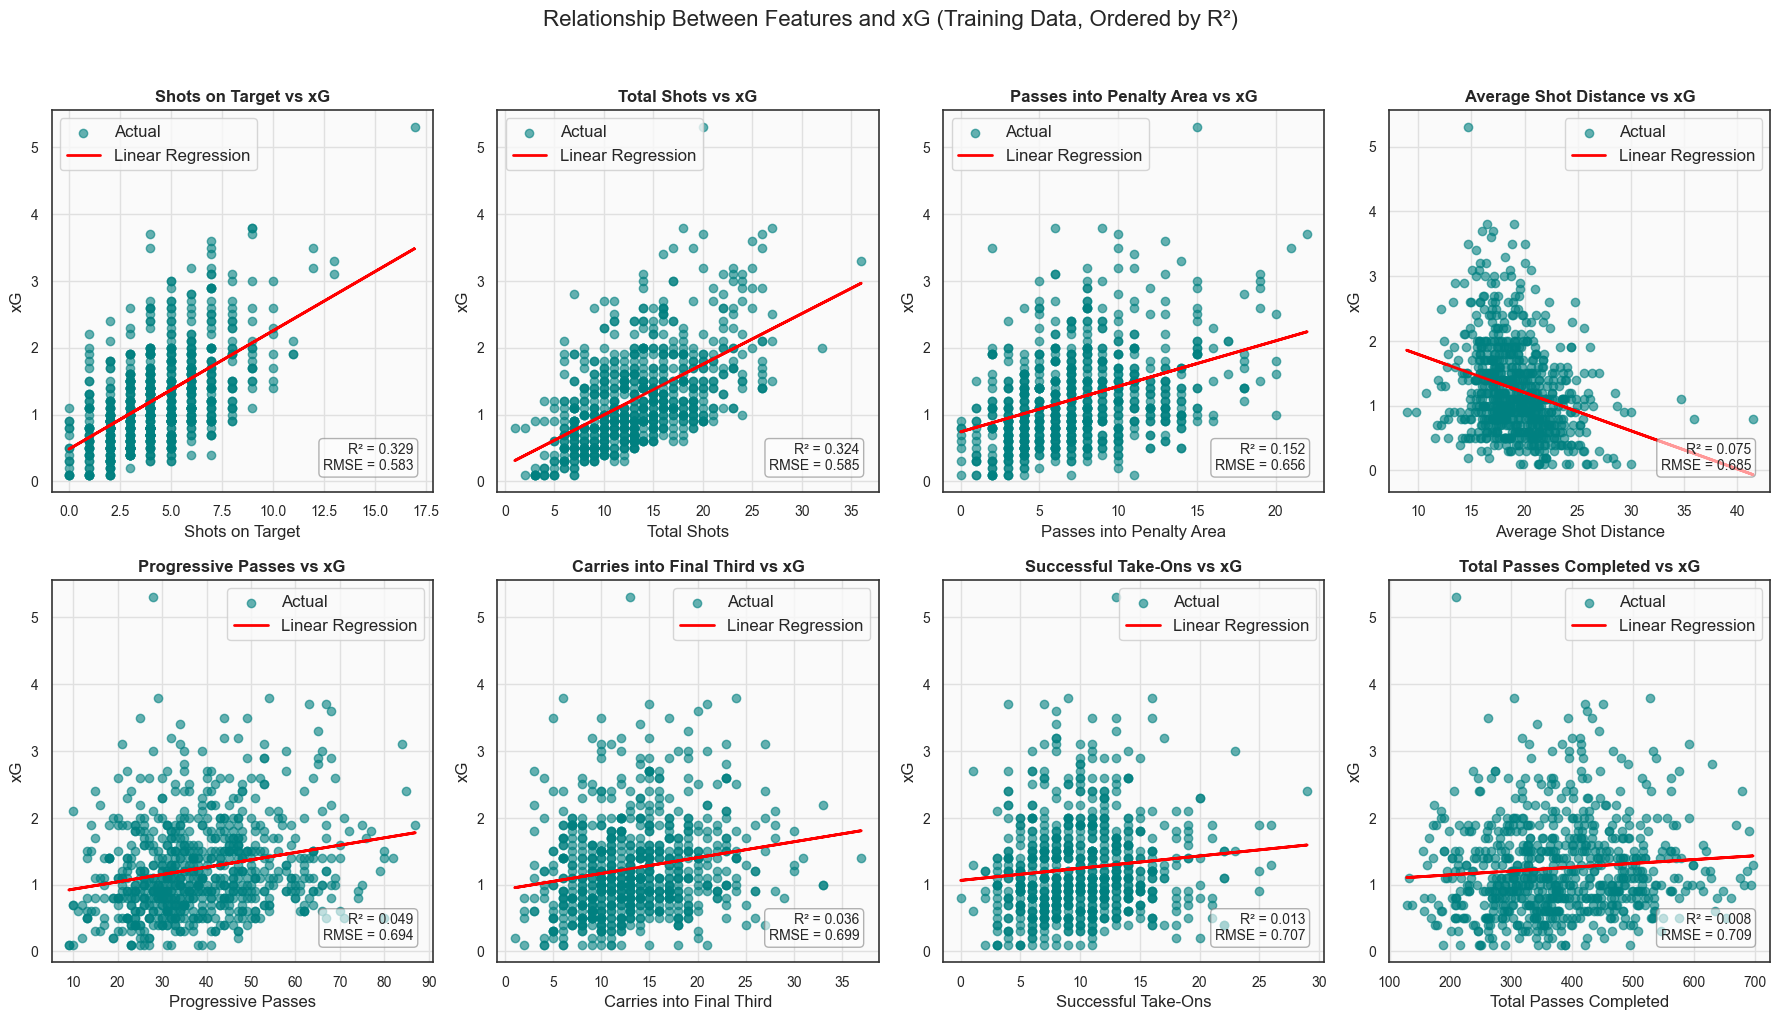

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))  # Larger figure to fit all subplots

# Detect column name (Portuguese or English)
col_var = "Variable" if "Variable" in results_df.columns else "Variável"

# --- Sort features by R² (descending) ---
sorted_features = (
    results_df[[col_var, "R²"]]
    .sort_values("R²", ascending=False)[col_var]
    .tolist()
)

for i, feature in enumerate(sorted_features, 1):
    X = train_df[[feature]]
    y = train_df[target]
    
    # Retrieve the trained model
    model = models[feature]
    y_pred = model.predict(X)
    
    plt.subplot(2, 4, i)
    plt.scatter(X, y, alpha=0.6, color='teal', label='Actual')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
    
    # Get R² and RMSE from results_df
    r2_val = results_df.loc[results_df[col_var] == feature, 'R²'].values[0]
    rmse_val = results_df.loc[results_df[col_var] == feature, 'RMSE'].values[0]
    
    # Add text box with metrics
    plt.text(
        0.95, 0.05, 
        f"R² = {r2_val:.3f}\nRMSE = {rmse_val:.3f}",
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray', boxstyle='round,pad=0.3')
    )
    
    # --- Use full feature name for title ---
    full_name = feature_names.get(feature, feature)
    plt.title(f"{full_name} vs xG", fontsize=12, fontweight='bold')
    
    plt.xlabel(full_name)
    plt.ylabel("xG")
    plt.legend()
    plt.grid(True)

plt.suptitle("Relationship Between Features and xG (Training Data, Ordered by R²)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [107]:
results_df.columns

Index(['Variável', 'Coeficiente', 'Intercepto', 'R²', 'RMSE'], dtype='object')

In [109]:
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Lista para armazenar os resultados
test_results = []

print("Desempenho nos dados de teste:\n")

for feature, model in models.items():
    X_test = test_df[[feature]]
    y_test = test_df[target]
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{feature}:")
    print(f"  R² = {r2:.4f}")
    print(f"  RMSE = {rmse:.4f}\n")
    
    # Armazena os resultados em uma lista de dicionários
    test_results.append({
        "Variável": feature,
        "R²": r2,
        "RMSE": rmse
    })

# Cria o DataFrame final
test_results_df = pd.DataFrame(test_results)

print("\n✅ Resultados armazenados em test_results_df:")
display(test_results_df)


Desempenho nos dados de teste:

Standard_Sh:
  R² = 0.3564
  RMSE = 0.5514

PrgP:
  R² = 0.1038
  RMSE = 0.6507

Total_Cmp:
  R² = 0.0256
  RMSE = 0.6785

PPA:
  R² = 0.2089
  RMSE = 0.6113

Take-Ons_Succ:
  R² = 0.0048
  RMSE = 0.6857

Carries_1/3:
  R² = 0.0366
  RMSE = 0.6746

Standard_SoT:
  R² = 0.3161
  RMSE = 0.5684

Standard_Dist:
  R² = 0.0923
  RMSE = 0.6548


✅ Resultados armazenados em test_results_df:


,Variável,R²,RMSE
0,Standard_Sh,0.356372,0.551397
1,PrgP,0.103803,0.650652
2,Total_Cmp,0.025578,0.678454
3,PPA,0.208857,0.611329
4,Take-Ons_Succ,0.004750,0.685667
5,Carries_1/3,0.036610,0.674603
6,Standard_SoT,0.316110,0.568382
7,Standard_Dist,0.092328,0.654805


[11/13/25 16:24:13] WARNING  /var/folders/w2/wrdxwwz568124kyj7nzvrsw80000gn/T/ipykernel_72342/39242 ]8;id=649853;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=118635;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             27326.py:58: MatplotlibDeprecationWarning: The get_cmap function was                  
                             deprecated in Matplotlib 3.7 and will be removed in 3.11. Use                         
                             ``matplotlib.colormaps`` or ``matplotlib.colormaps.get_cmap()`` or                    
                             ``pyplot.get_cmap()`` instead.                                                        
                               colors_r2 = [cm.get_cmap("YlGnBu")(v) for v in                                      
                             norm_r2(df_single_sorted["R²"].values)]                                               
                                                                                                                   

[11/13/25 16:24:14] WARNING  /var/folders/w2/wrdxwwz568124kyj7nzvrsw80000gn/T/ipykernel_72342/39242 ]8;id=707301;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=574770;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             27326.py:61: MatplotlibDeprecationWarning: The get_cmap function was                  
                             deprecated in Matplotlib 3.7 and will be removed in 3.11. Use                         
                             ``matplotlib.colormaps`` or ``matplotlib.colormaps.get_cmap()`` or                    
                             ``pyplot.get_cmap()`` instead.                                                        
                               colors_rmse = [cm.get_cmap("OrRd")(v) for v in                                      
                             norm_rmse(df_single_sorted["RMSE"].values)]                                           
                                                                                                                   

                    WARNING  /var/folders/w2/wrdxwwz568124kyj7nzvrsw80000gn/T/ipykernel_72342/39242 ]8;id=722685;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=287458;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             27326.py:67: FutureWarning:                                                           
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(                                                                        
                                                                                                                   

                    WARNING  /var/folders/w2/wrdxwwz568124kyj7nzvrsw80000gn/T/ipykernel_72342/39242 ]8;id=958367;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=943156;file:///opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#110\110]8;;\
                             27326.py:80: FutureWarning:                                                           
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(                                                                        
                                                                                                                   

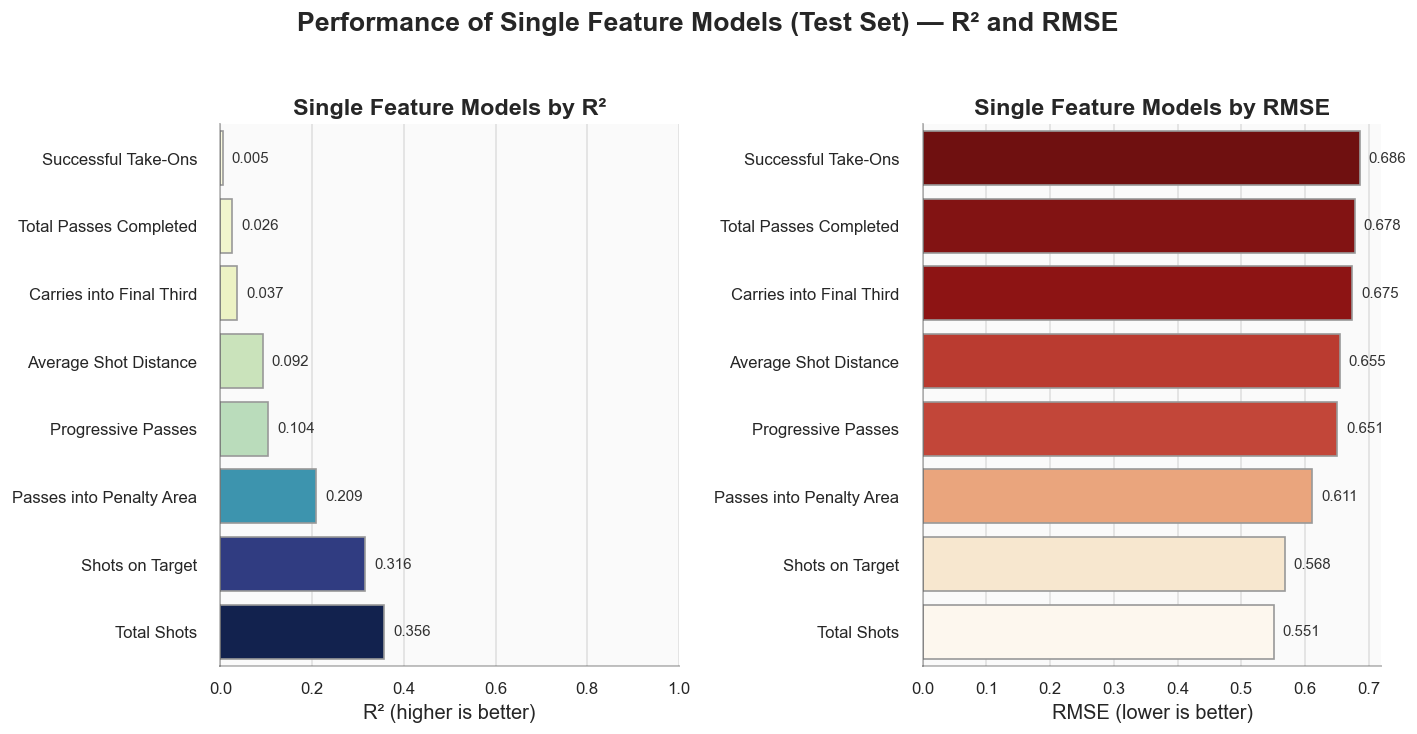

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize

# --- Base style ---
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams.update({
    "axes.edgecolor": "0.2",
    "axes.linewidth": 1.2,
    "axes.titleweight": "bold",
    "axes.titlesize": 15,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.facecolor": "white",
    "axes.facecolor": "#fafafa",
    "grid.color": "#e0e0e0"
})

# --- Feature name mapping ---
feature_names = {
    "Standard_Sh": "Total Shots",
    "PrgP": "Progressive Passes",
    "Total_Cmp": "Total Passes Completed",
    "PPA": "Passes into Penalty Area",
    "Take-Ons_Succ": "Successful Take-Ons",
    "Carries_1/3": "Carries into Final Third",
    "Standard_SoT": "Shots on Target",
    "Standard_Dist": "Average Shot Distance"
}

# --- Lista de single features ---
features = [
    "Standard_Sh", "PrgP", "Total_Cmp", "PPA",
    "Take-Ons_Succ", "Carries_1/3", "Standard_SoT", "Standard_Dist"
]

# --- Prepare Data ---
df_single = test_results_df.copy()

# Remove espaços extras na coluna Variável
df_single['Variável'] = df_single['Variável'].str.strip()

# Filtra apenas single features
df_single = df_single[df_single['Variável'].isin(features)].copy()

# Adiciona coluna com nomes legíveis
df_single["Feature Name"] = df_single["Variável"].map(lambda x: feature_names.get(x, x))

# --- Sort by R² ascending ---
df_single_sorted = df_single.sort_values("R²", ascending=True)
feature_order = df_single_sorted["Feature Name"]

# --- Normalize colors ---
norm_r2 = Normalize(vmin=df_single_sorted["R²"].min(), vmax=df_single_sorted["R²"].max())
colors_r2 = [cm.get_cmap("YlGnBu")(v) for v in norm_r2(df_single_sorted["R²"].values)]

norm_rmse = Normalize(vmin=df_single_sorted["RMSE"].min(), vmax=df_single_sorted["RMSE"].max())
colors_rmse = [cm.get_cmap("OrRd")(v) for v in norm_rmse(df_single_sorted["RMSE"].values)]

# --- Figure ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120)

# --- Chart 1: R² ---
sns.barplot(
    x="R²", y="Feature Name",
    data=df_single_sorted, order=feature_order,
    palette=colors_r2, edgecolor="0.6", ax=axes[0]
)
axes[0].set_title("Single Feature Models by R²", pad=15)
axes[0].set_xlabel("R² (higher is better)")
axes[0].set_ylabel("")
axes[0].set_xlim(0, 1)
for i, val in enumerate(df_single_sorted["R²"]):
    axes[0].text(val + 0.02, i, f"{val:.3f}", va="center", fontsize=9, color="#333")

# --- Chart 2: RMSE ---
sns.barplot(
    x="RMSE", y="Feature Name",
    data=df_single_sorted, order=feature_order,
    palette=colors_rmse, edgecolor="0.6", ax=axes[1]
)
axes[1].set_title("Single Feature Models by RMSE", pad=15)
axes[1].set_xlabel("RMSE (lower is better)")
axes[1].set_ylabel("")
rmse_max = df_single_sorted["RMSE"].max()
for i, val in enumerate(df_single_sorted["RMSE"]):
    axes[1].text(val + rmse_max*0.02, i, f"{val:.3f}", va="center", fontsize=9, color="#333")

# --- Finishing touches ---
for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_alpha(0.3)
    ax.spines["bottom"].set_alpha(0.3)
    ax.tick_params(axis="y", pad=8)
    ax.set_title(ax.get_title(), fontsize=14, fontweight="bold")

plt.suptitle("Performance of Single Feature Models (Test Set) — R² and RMSE", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()
